In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv('credit_card_data(utf8).txt')
df.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0


In [5]:
# 경기동행지수 # coincident composite index
cci = pd.read_csv('경기동행지수_월별.csv') 

In [6]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [13]:
# data_by_seoul = data_by_loc[data_by_loc.city=='서울']
# data_by_incheon = data_by_loc[data_by_loc.city=='인천']
# data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
# data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [14]:
# data_by_10s = data_by_loc[data_by_loc.ages=='10대']
# data_by_20s = data_by_loc[data_by_loc.ages=='20대']
# data_by_30s = data_by_loc[data_by_loc.ages=='30대']
# data_by_40s = data_by_loc[data_by_loc.ages=='40대']
# data_by_50s = data_by_loc[data_by_loc.ages=='50대']
# data_by_60s = data_by_loc[data_by_loc.ages=='60대']
# data_by_70s = data_by_loc[data_by_loc.ages=='70대']
# data_by_80s = data_by_loc[data_by_loc.ages=='80대']
# data_by_90s = data_by_loc[data_by_loc.ages=='90대']

In [43]:
temp_df = pd.merge(data_by_loc, cci, how='left')
temp_df.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,avg_score_rate,year_month,cci
0,L011,2016.0,1.0,812.0,2.0,서울,NaN,10대,55000.0,1.44,...,1120000.0,8210000.0,78020000.0,92170000.0,87260000.0,0.0,0.0,B,201601.0,100.1


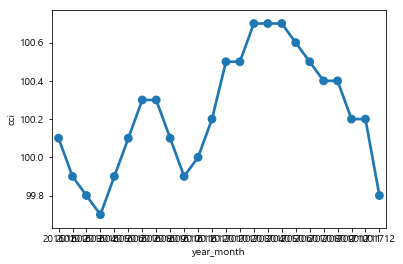

In [16]:
sns.pointplot(x='year_month', y='cci', data=cci)

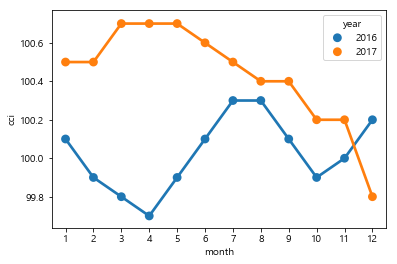

In [9]:
sns.pointplot(x='month', y='cci', hue='year',data=cci)

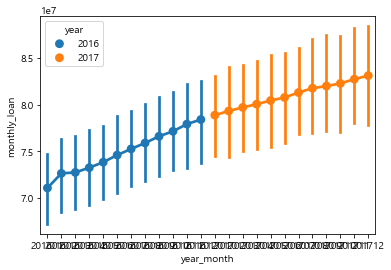

In [32]:
# sns.pointplot(x='month', y='avg_score', data=data_by_40s, hue='year')
sns.pointplot(x='year_month', y='avg_score', data=temp_df, hue='year')

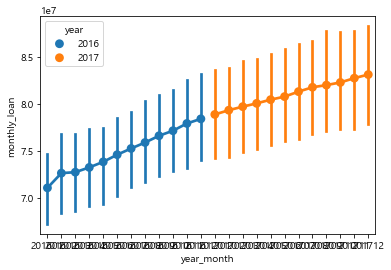

In [33]:
# sns.pointplot(x='month', y='monthly_loan', data=data_by_40s, hue='year')
sns.pointplot(x='year_month', y='monthly_loan', data=temp_df, hue='year')

In [21]:
temp_df.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,year_month,cci
0,L014,2016,1,769,3,서울,NaN,40대,1895000,4.45,...,860000,15350000,42050000,27110000,35780000,117710000,1222000,319000,201601,100.1


In [25]:
# sns.lmplot(x='cci', y='avg_score', hue='year_month', data=temp_df)

In [22]:
# sns.lmplot(x='cci', y='monthly_loan', hue='year_month', data=temp_df)

In [44]:
temp_df['avg_score_rate']=1

In [45]:
temp_df=temp_df.reindex(range(0,len(data_by_loc)))

In [46]:
for i in range(0,len(temp_df['avg_score'])):
    
    if temp_df['avg_score'][i]>825:        
        temp_df['avg_score_rate'][i]="A"
        
    elif temp_df['avg_score'][i]>800:        
        temp_df['avg_score_rate'][i]="B"
        
    elif temp_df['avg_score'][i]>775:
        temp_df['avg_score_rate'][i]="C"
        
    elif temp_df['avg_score'][i]>750:        
        temp_df['avg_score_rate'][i]="D"
        
    elif temp_df['avg_score'][i]>725:
        temp_df['avg_score_rate'][i]="F"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: Se

In [47]:
temp_df['avg_score']

0       812.0
1       773.0
2       771.0
3       770.0
4       771.0
5       771.0
6       772.0
7       772.0
8       772.0
9       773.0
10      775.0
11      775.0
12      776.0
13      774.0
14      772.0
15      772.0
16      773.0
17      773.0
18      774.0
19      774.0
20      774.0
21      775.0
22      776.0
23      777.0
24      811.0
25      767.0
26      765.0
27      764.0
28      765.0
29      765.0
        ...  
3426      NaN
3427      NaN
3428      NaN
3429      NaN
3430      NaN
3431      NaN
3432      NaN
3433      NaN
3434      NaN
3435      NaN
3436      NaN
3437      NaN
3438      NaN
3439      NaN
3440      NaN
3441      NaN
3442      NaN
3443      NaN
3444      NaN
3445      NaN
3446      NaN
3447      NaN
3448      NaN
3449      NaN
3450      NaN
3451      NaN
3452      NaN
3453      NaN
3454      NaN
3455      NaN
Name: avg_score, Length: 3456, dtype: float64

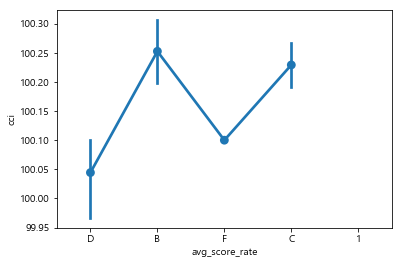

In [35]:
# sns.lmplot(x='cci', y='avg_score_rate', data=temp_df)
sns.pointplot(x='avg_score_rate', y='cci', data=temp_df)

ValueError: 'c' argument has 11 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

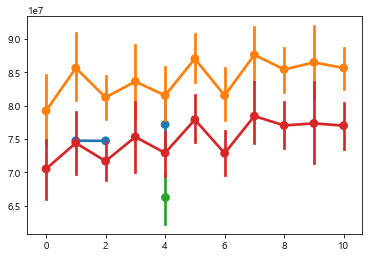

In [38]:
sns.pointplot(x='cci', y='monthly_loan', hue='avg_score_rate', data=temp_df)

In [50]:
cci*9

,year_month,year,month,cci
0,1814409,18144,9,900.9
1,1814418,18144,18,899.1
2,1814427,18144,27,898.2
3,1814436,18144,36,897.3
4,1814445,18144,45,899.1
5,1814454,18144,54,900.9
6,1814463,18144,63,902.7
7,1814472,18144,72,902.7
8,1814481,18144,81,900.9
9,1814490,18144,90,899.1


In [9]:
gdp = pd.read_csv('gdp.xlsx') 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2
